In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics

df = pd.read_csv("data/Hotel_Reviews_NLP.csv")
df.head()

,Hotel_Name,Hotel_Address,Total_Number_of_Reviews,Average_Score,Reviewer_Score,Negative_Sentiment,Positive_Sentiment,Reviewer_Nationality,Leisure_trip,Couple,Solo_traveler,Business_trip,Group,Family_with_young_children,Family_with_older_children,With_a_pet,Negative_Review,Positive_Review
0,South Place Hotel,"London, United Kingdom",326,9.267178,2.5,-0.9849,-0.9820,Brazil,0,1,0,0,0,0,0,0,No windows claustrophobic place even superior ...,Bathroom Shower We going stay twice hotel 2 ni...
1,Park Plaza County Hall London,"London, United Kingdom",2223,8.369546,3.8,-0.9780,-0.9780,Saudi Arabia,1,0,0,0,0,1,0,0,I completely disappointed mad since reception ...,I completely disappointed mad since reception ...
2,Britannia International Hotel Canary Wharf,"London, United Kingdom",4789,6.826644,3.3,-0.4767,-0.9751,Australia,1,1,0,0,0,0,0,0,everything terrible,get everything extra internet parking breakfas...
3,Caesar Hotel,"London, United Kingdom",317,8.263722,3.3,0.1082,-0.9721,United States Minor Outlying Islands,1,0,0,0,1,0,0,0,Everything I worst experience ever best friend...,I didnt like anythig Room small Asked upgrade ...
4,Hotel Da Vinci,"Milan, Italy",1877,7.790144,2.5,0.0000,-0.9703,United Kingdom,1,0,0,0,0,1,0,0,No Negative,Very rude manager abusive staff reception Dirt...


In [101]:
le = LabelEncoder()

df = df

X = df.loc[:, ("Reviewer_Score", "Negative_Sentiment", "Positive_Sentiment")]

y = [x < 5 for x in df.Reviewer_Score]

X.head(100)

,Reviewer_Score,Negative_Sentiment,Positive_Sentiment
0,2.5,-0.9849,-0.9820
1,3.8,-0.9780,-0.9780
2,3.3,-0.4767,-0.9751
3,3.3,0.1082,-0.9721
4,2.5,0.0000,-0.9703
...,...,...,...
95,3.8,0.0000,-0.8779
96,6.7,0.6808,-0.8779
97,2.9,-0.5423,-0.8779
98,7.1,0.0000,-0.8750


<AxesSubplot:>

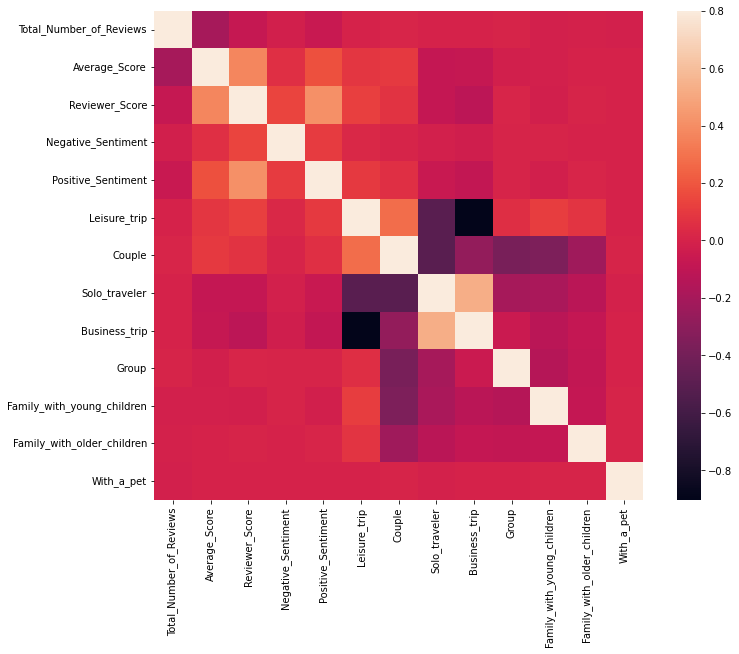

In [102]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

C:\Users\blazr\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


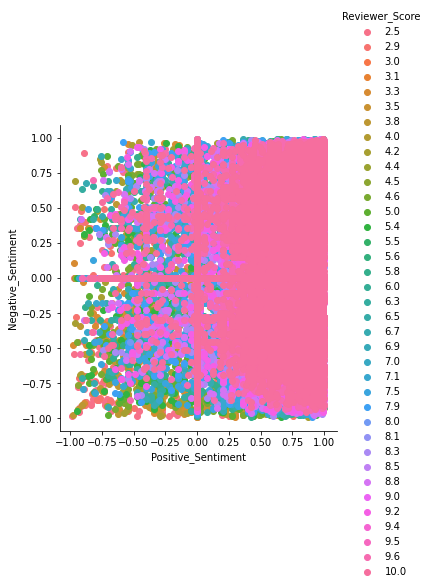

In [103]:
sns.FacetGrid(df, hue="Reviewer_Score", size=5) \
   .map(plt.scatter, "Positive_Sentiment", "Negative_Sentiment") \
   .add_legend()

In [104]:
km = KMeans(n_clusters=2, random_state=1)
km.fit(X)

y_cluster_kmeans = km.predict(X)

In [105]:
labels = y_cluster_kmeans = km.predict(X)

correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, len(y)))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(len(y))))

Result: 391024 out of 515738 samples were correctly labeled.
Accuracy score: 0.76


C:\Users\blazr\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


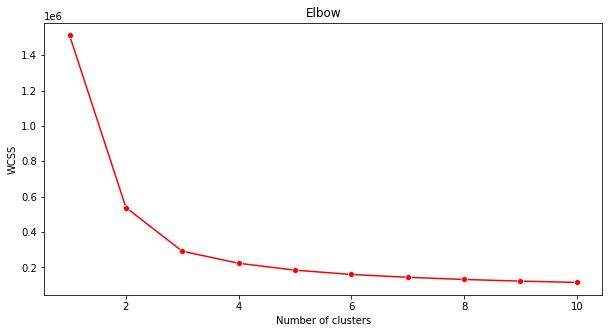

In [106]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

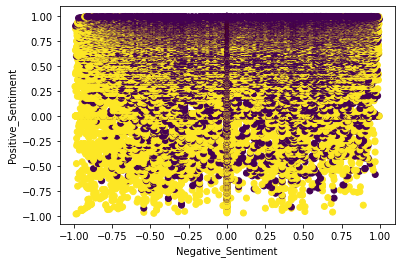

In [107]:
kmeans = KMeans(n_clusters = 2, random_state=0)

kmeans.fit(X)
labels = kmeans.predict(X)
plt.scatter(X["Negative_Sentiment"], X["Positive_Sentiment"], c = labels)
plt.xlabel("Negative_Sentiment")
plt.ylabel("Positive_Sentiment")
plt.show()



The results are quite disappointing, I think that accuracy of 76% is achieved since we are predicting if score is less or greater than 5 based on sentiment, therefore we only use 2 clusters, making it quite simple... But, it does show that there is some patern in sentiment and reviewer score.